In [1]:
import argparse
import requests
import csv
import datetime
import matplotlib
import pandas as pd
import re
from os.path import lexists


In [ ]:
def get_update_time_from_web(url):
    rsp_dict = dict(requests.head(url).headers)
    # Fri, 14 Oct 2022 11:10:59 GMT
    return rsp_dict['Last-Modified']

In [ ]:
def get_update_time(file_path):
    with open(file_path, mode='r') as f:
        r = f.readlines()
        f.close()
        return r[0]

In [ ]:
def write_update_time(file_path, content):
    with open(file_path, mode="r+") as f:
        f.seek(0, 0)
        f.writelines(content + '\n')    
        f.close()
        

In [ ]:
def download(url, file_path):
    url_data = requests.get(url).text.encode()
    print('Data needs download, downloading...')
    with open(file_path, mode="wb") as f:
        f.write(url_data)
        f.close()

In [ ]:
file_path = 'ar_index_global_prof.txt'
url = 'https://data-argo.ifremer.fr/ar_index_global_prof.txt'
download(file_path=file_path, url=url)

In [ ]:
content = get_update_time_from_web(url)
write_update_time(file_path=file_path, content=str(content))

In [ ]:
rsp_dict = dict(requests.head(url).headers)

In [ ]:
get_update_time(file_path)

In [ ]:
file_path = 'ar_index_global_prof.txt'
def transfer2csv(file_path):
    with open(file_path, mode='r') as f, open("data.csv",'w',newline='',encoding='utf-8') as csvFile:
        csvFile = open("data.csv",'w',newline='',encoding='utf-8')
        writer = csv.writer(csvFile) 
        csvRow = [] 
        for line in f.readlines()[9:]:
            csvRow = line.split(',')
            writer.writerow(csvRow)
        csvFile.close()
        f.close()


In [ ]:
transfer2csv(file_path)

In [ ]:
def get_time():
    dt_time = int(datetime.datetime.gmtNow.timestamp())
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day

In [ ]:
time = datetime.datetime.now()
current_time = str(time.year * 10e4 + time.month * 10e2+ time.day)
current_time

In [ ]:
search_date = '20221002'

df = pd.read_csv('data.csv')
df.dtypes

In [ ]:
df_update = df[df['date_update\n'].astype(str).str.contains(search_date)]
df_update.head

In [ ]:
def get_data_via_date():
    time = datetime.datetime.now()
    time_today = str(int(time.year * 10e3 + time.month * 10e1 + time.day))
    print(time_today)
    time_today = '20220602'
    df = pd.read_csv('data.csv')
    update = df[df['date_update\n'].astype(str).str.contains(r'^'+time_today)]
    return update

In [ ]:
df_update = get_data_via_date().head()

In [49]:
df_update
update_df = pd.read_csv('data.csv')

In [53]:
def file2site(df):
    file_name = df['file'].split('/')[1]
    site = int(float(file_name))
    return site

In [56]:
def file2site_num(df):
    file_name = df['file'].split('/')[3]
    site_num = int(file_name)
    return site_num

In [57]:
# site = update_df.apply(file2site, axis=1)
site_num = update_df.apply(file2site_num, axis=1)

In [59]:
site_num.head()
site = site_num

In [60]:
update_df.insert(1, 'site', site_num)

In [61]:
update_df.head(5)

,file,site,date,latitude,longitude,ocean,profiler_type,institution,date_update\n
0,aoml/13857/profiles/R13857_001.nc,13857,1.997073e+13,0.267,-16.032,A,845,AO,20181011180520
1,aoml/13857/profiles/R13857_002.nc,13857,1.997081e+13,0.072,-17.659,A,845,AO,20181011180521
2,aoml/13857/profiles/R13857_003.nc,13857,1.997082e+13,0.543,-19.622,A,845,AO,20181011180521
3,aoml/13857/profiles/R13857_004.nc,13857,1.997083e+13,1.256,-20.521,A,845,AO,20181011180521
4,aoml/13857/profiles/R13857_005.nc,13857,1.997091e+13,0.720,-20.768,A,845,AO,20181011180521


In [62]:
update_df.groupby('site', as_index=False)

In [63]:
update_df

,file,site,date,latitude,longitude,ocean,profiler_type,institution,date_update\n
0,aoml/13857/profiles/R13857_001.nc,13857,1.997073e+13,0.267,-16.032,A,845,AO,20181011180520
1,aoml/13857/profiles/R13857_002.nc,13857,1.997081e+13,0.072,-17.659,A,845,AO,20181011180521
2,aoml/13857/profiles/R13857_003.nc,13857,1.997082e+13,0.543,-19.622,A,845,AO,20181011180521
3,aoml/13857/profiles/R13857_004.nc,13857,1.997083e+13,1.256,-20.521,A,845,AO,20181011180521
4,aoml/13857/profiles/R13857_005.nc,13857,1.997091e+13,0.720,-20.768,A,845,AO,20181011180521
...,...,...,...,...,...,...,...,...,...
2707576,nmdis/2901633/profiles/R2901633_067.nc,2901633,2.013050e+13,27.462,139.107,P,841,NM,20130507103443
2707577,nmdis/2901633/profiles/R2901633_068.nc,2901633,2.013051e+13,27.432,138.840,P,841,NM,20130511165723
2707578,nmdis/2901633/profiles/R2901633_069.nc,2901633,2.013052e+13,27.692,138.677,P,841,NM,20130521170139
2707579,nmdis/2901633/profiles/R2901633_070.nc,2901633,2.013053e+13,27.895,138.465,P,841,NM,20130531181516


In [68]:
update_count = update_df.groupby('site')['site'].count().sort_values(ascending=True)
update_count.head(115)

site
5906721    1
4901756    1
4903464    1
2903730    1
1900930    1
          ..
3900694    2
5906715    2
4900269    2
6901161    2
5903753    2
Name: site, Length: 115, dtype: int64

In [71]:
update_count.shape[0]

17211

In [72]:
df.shape[0]

2707581

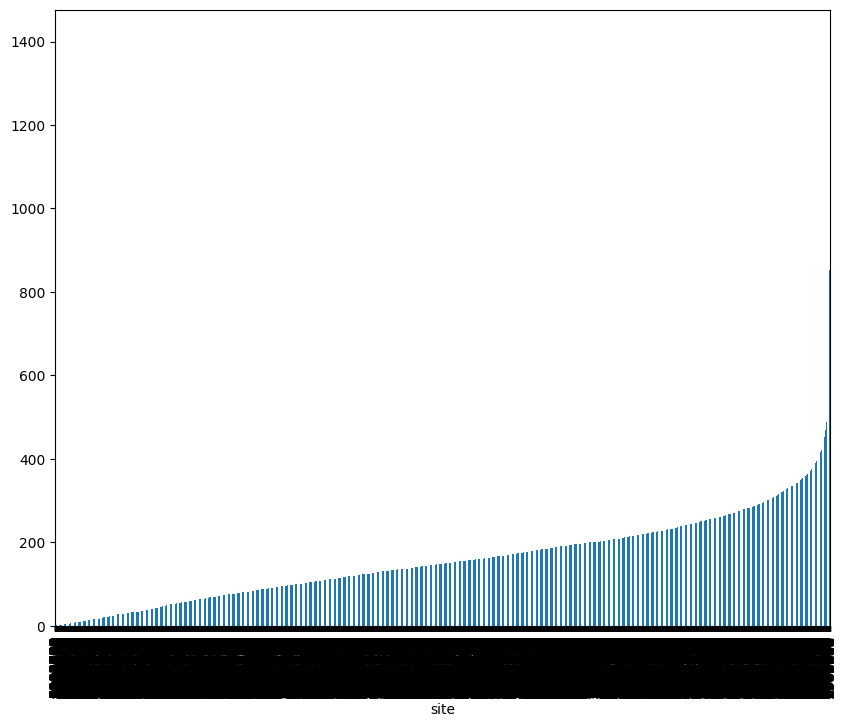

In [76]:
fig_col = update_count.plot(figsize=(10, 8), kind = 'bar')

In [78]:
update_count.max

<bound method NDFrame._add_numeric_operations.<locals>.max of site
5906721       1
4901756       1
4903464       1
2903730       1
1900930       1
           ... 
5905137     993
3902109    1000
4902140    1260
4903361    1310
3901161    1406
Name: site, Length: 17211, dtype: int64>

In [14]:
df = pd.read_csv('data.csv')
df.dtypes
def add_site(df):
    def file2site(_df):
        file_name = _df['file'].split('/')[1]
        site_num = int(float(file_name))
        return site_num

    site = df.apply(file2site, axis=1)
    df.insert(1, 'site', site)
add_site(df)

In [17]:
# 104°E-125°E，4°N-26°N
df_scs = df[(df['latitude'] >= 4) & (df['latitude'] <= 26) &
                (df['longitude'] <= 125) & (df['longitude']  >= 104)]
df_scs.head()
# df_scs['site'].unique()

,file,site,date,latitude,longitude,ocean,profiler_type,institution,date_update\n
190613,aoml/2900371/profiles/R2900371_001.nc,2900371,2.005011e+13,21.913,123.085,P,846,AO,20181012220233
190614,aoml/2900371/profiles/R2900371_003.nc,2900371,2.005012e+13,21.786,122.828,P,846,AO,20181012220234
190615,aoml/2900371/profiles/R2900371_004.nc,2900371,2.005012e+13,21.757,122.695,P,846,AO,20170525184214
190616,aoml/2900371/profiles/R2900371_005.nc,2900371,2.005012e+13,21.659,122.666,P,846,AO,20181016184158
190617,aoml/2900371/profiles/R2900371_006.nc,2900371,2.005012e+13,21.632,122.695,P,846,AO,20170525184214


In [18]:
def add_float(df):
    def file2float(_df):
        float_name = _df['file'].split('/')[1]
        float_name = str(float_name)
        return float_name

    site = df.apply(file2float, axis=1)
    df.insert(2, 'float', site)
    df.to_csv('data.csv')


In [3]:
df = pd.read_csv('data.csv')
df.head()
df_scs = df[(df['latitude'] >= 4) & (df['latitude'] <= 26) &
                (df['longitude'] <= 125) & (df['longitude'] >= 104)]

In [22]:
df_scs['site'].unique()
df_scs['float'].unique().shape[0]

array(['aoml', 'csio', 'csiro', 'jma', 'kma'], dtype=object)

In [4]:
df_scs.head(15)

,Unnamed: 0,file,site,float,date,latitude,longitude,ocean,profiler_type,institution,date_update\n
190660,190660,aoml/2900371/profiles/R2900371_001.nc,aoml,2900371,2.005011e+13,21.913,123.085,P,846,AO,20181012220233
190661,190661,aoml/2900371/profiles/R2900371_003.nc,aoml,2900371,2.005012e+13,21.786,122.828,P,846,AO,20181012220234
190662,190662,aoml/2900371/profiles/R2900371_004.nc,aoml,2900371,2.005012e+13,21.757,122.695,P,846,AO,20170525184214
190663,190663,aoml/2900371/profiles/R2900371_005.nc,aoml,2900371,2.005012e+13,21.659,122.666,P,846,AO,20181016184158
190664,190664,aoml/2900371/profiles/R2900371_006.nc,aoml,2900371,2.005012e+13,21.632,122.695,P,846,AO,20170525184214
190665,190665,aoml/2900371/profiles/R2900371_007.nc,aoml,2900371,2.005013e+13,21.584,122.932,P,846,AO,20181016184158
190666,190666,aoml/2900371/profiles/R2900371_008.nc,aoml,2900371,2.005013e+13,21.695,122.935,P,846,AO,20170525184215
190667,190667,aoml/2900371/profiles/R2900371_009.nc,aoml,2900371,2.005020e+13,21.810,122.979,P,846,AO,20181016184158
190668,190668,aoml/2900371/profiles/R2900371_010.nc,aoml,2900371,2.005020e+13,21.935,123.029,P,846,AO,20170525184215
190669,190669,aoml/2900371/profiles/R2900371_011.nc,aoml,2900371,2.005021e+13,22.046,123.069,P,846,AO,20181016184158


In [25]:
df_scs['float'].head()

190613    2900371
190614    2900371
190615    2900371
190616    2900371
190617    2900371
Name: float, dtype: int64

In [2]:
df = pd.read_csv('data.csv')
df_new = df[(df['latitude'] >= 4) & (df['latitude'] <= 26) &
                (df['longitude'] <= 125) & (df['longitude'] >= 104)]

In [3]:
df_new.head()

,Unnamed: 0,file,site,float,date,latitude,longitude,ocean,profiler_type,institution,date_update\n
190660,190660,aoml/2900371/profiles/R2900371_001.nc,aoml,2900371,2.005011e+13,21.913,123.085,P,846,AO,20181012220233
190661,190661,aoml/2900371/profiles/R2900371_003.nc,aoml,2900371,2.005012e+13,21.786,122.828,P,846,AO,20181012220234
190662,190662,aoml/2900371/profiles/R2900371_004.nc,aoml,2900371,2.005012e+13,21.757,122.695,P,846,AO,20170525184214
190663,190663,aoml/2900371/profiles/R2900371_005.nc,aoml,2900371,2.005012e+13,21.659,122.666,P,846,AO,20181016184158
190664,190664,aoml/2900371/profiles/R2900371_006.nc,aoml,2900371,2.005012e+13,21.632,122.695,P,846,AO,20170525184214


In [5]:
import folium

In [22]:
m = folium.Map(
    location=[15, 115],
    zoom_start=6,
    tiles='Stamen Terrain'
)
m.save('index.html')

In [24]:
from folium import plugins
park_map = folium.Map(location=[df_scs['latitude'].mean(), df_scs['longitude'].mean()], zoom_start=7, control_scale=True,)
marker_cluster = plugins.MarkerCluster().add_to(park_map)
 
for name,row in df_scs.iterrows():
    folium.Marker(location=[row["latitude"], row["longitude"]]).add_to(marker_cluster)
park_map.save('park_map2.html')

In [2]:
df_new = pd.read_csv('update_df.csv')

In [3]:
def south_china_sea_update(df):
    df_scs = df[(df['latitude'] >= 4) & (df['latitude'] <= 26) &
                (df['longitude'] <= 125) & (df['longitude'] >= 104)]
    df_scs = df_scs.dropna(how='any')
    scs_map = folium.Map(location=[df_scs['latitude'].mean(), df_scs['longitude'].mean()], zoom_start=7,
                         control_scale=True)
    marker_cluster = plugins.MarkerCluster().add_to(scs_map)

    for name, row in df_scs.iterrows():
        folium.Marker(location=[row["latitude"], row["longitude"]]).add_to(marker_cluster)
    scs_map.save('scs_vis.html')

In [4]:
df_new.head()

,Unnamed: 0.1,Unnamed: 0,file,site,date,latitude,longitude,ocean,profiler_type,institution,date_update\n
0,172095,172095,aoml/1902314/profiles/R1902314_030.nc,aoml,2.022101e+13,22.748,-65.753,A,854,AO,20221022000110
1,172096,172096,aoml/1902314/profiles/R1902314_031.nc,aoml,2.022102e+13,23.054,-66.067,A,854,AO,20221022000111
2,173262,173262,aoml/1902397/profiles/R1902397_029.nc,aoml,2.022101e+13,-22.476,-0.103,A,854,AO,20221022000113
3,173263,173263,aoml/1902397/profiles/R1902397_030.nc,aoml,2.022102e+13,-22.901,-0.624,A,854,AO,20221022000115
4,422338,422338,aoml/3901314/profiles/R3901314_191.nc,aoml,2.022101e+13,-28.492,-91.814,P,853,AO,20221022020111


In [9]:
import folium
from folium import plugins
df_new = df_new.dropna()
park_map = folium.Map(location=[df_new['latitude'].mean(), df_new['longitude'].mean()], zoom_start=7, control_scale=True,)
marker_cluster = plugins.MarkerCluster().add_to(park_map)
 
for name,row in df_new.iterrows():
    folium.Marker(location=[row["latitude"], row["longitude"]]).add_to(marker_cluster)
park_map.save('park_map2.html')